In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df

In [ ]:
df.head

In [2]:
df = pd.read_csv("la_crime_2010_to_2023.csv")
print("Initial Shape:", df.shape)

Initial Shape: (2477216, 29)


In [3]:

df = df.drop(columns=[
    'DR_NO', 'Date Rptd', 'TIME OCC', 'Rpt Dist No', 'Part 1-2',
    'Crm Cd Desc', 'Status', 'Status Desc', 'LOCATION',
    'Cross Street', 'LAT', 'LON'
], errors='ignore')

df = df.dropna(subset=['DATE OCC', 'AREA NAME', 'Crm Cd'])

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df = df.dropna(subset=['DATE OCC'])

df['Year'] = df['DATE OCC'].dt.year.astype('Int64')

C:\Users\hp-d\AppData\Local\Temp\ipykernel_13772\397506715.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


In [4]:

le = LabelEncoder()
df['Area Name Encoded'] = le.fit_transform(df['AREA NAME'])

X = df[['Area Name Encoded', 'Year']]
y = df['Crm Cd']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:


param_grid = {'n_neighbors': np.arange(3, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


C:\Users\hp-d\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
best_k = grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

In [ ]:

y_pred = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

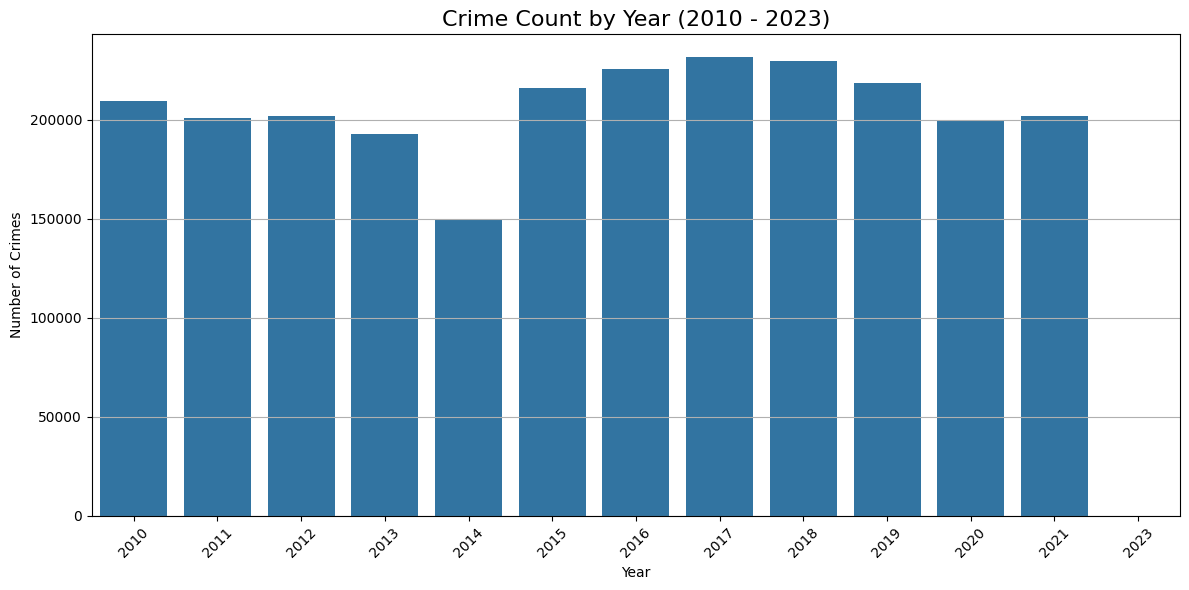

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, order=sorted(df['Year'].dropna().unique()))
plt.title("Crime Count by Year (2010 - 2023)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()